<a href="https://colab.research.google.com/github/jplavorr/Data-Science/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://i.postimg.cc/zXN3DHM3/Captura-de-tela-2021-04-22-145652.png">

#### **Data Science & Machine Learning**
*by [João Pedro Lavor](https://www.linkedin.com/in/jo%C3%A3o-pedro-lavor-65162312b/)*  

---

**Churn Rate**, ou simplesmente churn, representa a taxa de evasão da sua base de clientes.

Entender por que seus clientes abandonam o seu serviço é vital para conquistar um crescimento sustentável. Como o Churn tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios.

Neste post, vamos explorar o que é o churn e como podemos prevê-lo usando Machine Learning. Também tentarei mostrar indicadores sobre o porquê os clientes possam estar abandonando o serviço e solicitando o cancelamento.

#Churn Prediction para uma empresa de Telecomunicações

Suponha que um cliente faz uso de seus serviços com certa frequência. E, de repente, deixa de usá-los e abandona sua empresa. As principais perguntas a serem feitas são: Por que isso acontece? Como reverter essa situação? Como melhor identificar esses clientes?

Nesses momentos, ter um arsenal de dados sobre o consumidor, além de conseguir analisá-los, transformá-los em informações e extrair insights delas, faz toda a diferença.

 No primeiro capitulo do livro '*Data Science para Negócios*', um dos problemas que ele aborda é o uso de dados em prol de tentar impedir a rotatividade de clientes de uma determinada empresa. Atrair novos clientes é mais caro do que manter os que já existem, por isso, empresas tem que procurar investir em marketing para evitar rotatividade. *Churn* pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Data Science entra para decidir quais clientes irão receber a oferta antes dos termino dos seus contratos. Nesse artigo, irei construir um modelo de Machine Learning que foca justamente nesse problema para uma empresa de telecomunicações, aonde iremos tentar identificar a partir da base de dados, quais clientes em termino de contrato estão mais propensos a cancelarem o serviço da empresa.

<p align=center>
<img src="https://miro.medium.com/max/800/0*dzmm3qresODlScte" width="60%"></p>

Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas. Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Irei adicionar as demais bibliotecas na medida que elas forem necessárias. Iremos, por hora, apenas importas as bibliotecas bases para análise de dados.

In [3]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno


# random seed
np.random.seed(42)

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')
%matplotlib inline


In [4]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Acima, temos uma visão das 5 primeiras entradas do nosso conjunto de dados. Através de uma breve olhada, podemos ver que os dados representam informações de serviços e pagamentos dos clientes. Mesmo que não tendo descrição exata das variáveis, é possível ter uma noção do que se tratam, pois são serviços padrões de uma empresa de telecomunicações.

In [5]:
print("Número de Entradas:",df.shape[0])
print("\nNúmero de Colunas:",df.shape[1])

Número de Entradas: 7043

Número de Colunas: 21


Como se verifica acima, o dataset é composto de 7043 entradas e 21 variáveis.

#Análise Exploratória de Dados

Sempre antes de começar a treinar seu modelo de Machine Learning, temos que fazer uma análise nos dados presentes na tabela para verificar sua integridade, em prol de descobrir se é preciso ser feita alguma limpeza ou mudança nas variáveis presente nos dados.

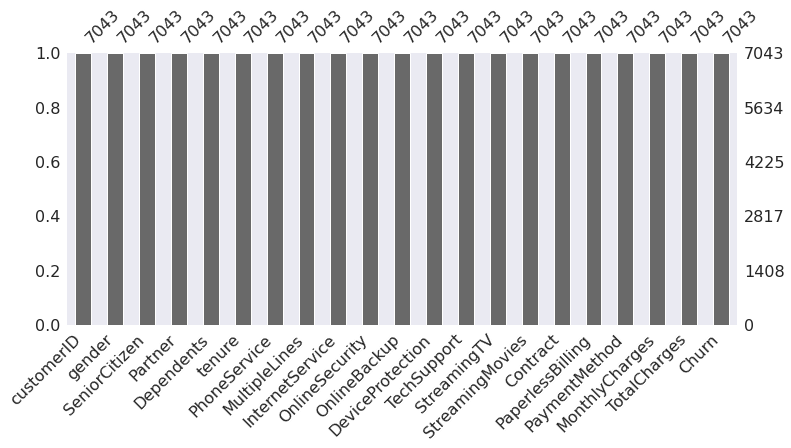

In [6]:
#Plotando dados ausentes
msno.bar(df, figsize=(12,5));

In [7]:
print("\nTipo das Variáveis presentes no DataSet:",df.dtypes)
print('\nValores únicos por variável:', df.nunique())
print("\nNome das variáveis:", df.columns.values)


Tipo das Variáveis presentes no DataSet: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Valores únicos por variável: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
S

Acima, verificamos as seguintes informações:
* Dados ausentes:
    * O gráfico de barras, é uma maneira visual de mostra a quantidade de ausentes para cada coluna do nosso DataSet. Como podemos ver, não há dados ausentes. 

* Tipo das Variáveis:
  * As features são compostas em sua maioria por variáveis categóricas.
  * A coluna `TotalCharges` é uma variável númerica sem dados ausentes, mas está sendo apresentada como `string`. 
  * Mais a frente, iremos passar as features categóricas para valor numérico.
  * A nossa **variável alvo** se encontra na coluna `Churn`, que indica a quantidade de clientes que encerraram o serviço no anterior.
  * A coluna `customerID` não agrega no treinamento do modelo, portante ela será retirada posteriormente.






###Proporção de Churn
É muito importante saber como nossa variável alvo `Churn` está distribuida.   

Proporção de Churn da Empresa: 0.2653698707936959


[]

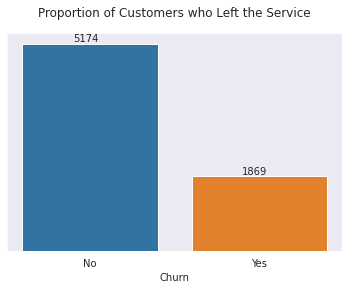

In [8]:
#Proporção de Churn na empresa
print("Proporção de Churn da Empresa:",df['Churn'].value_counts()[1]/df.shape[0])
x = ['No', 'Yes']
y = [df['Churn'].value_counts().values[0], df['Churn'].value_counts().values[1]]
fig, ax = plt.subplots()
#ax = plt.gca()
ax.set_xlabel('Churn')
#Deixar o eixo y invisivel 
ax.get_yaxis().set_visible(False)
ttl = ax.title
ttl.set_position([.5, 1.05])
#plt.draw()
sns.countplot(df['Churn'], ax=ax)
ax.set_title('Proportion of Customers who Left the Service')
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    plt.annotate(y[i], (-0.1 + i, y[i] + j))


plt.plot()

A empresa em questão se encontra com uma Taxa de Churn de 26.53%. Portanto, estamos lidando com um DataSet desbalanceado. A quantidade de Churns é significativamente menor do que as não Chruns.

Retornando a situação da coluna `TotalCharges`, iremos ver, como é possível identificar o erro presente nela. Ao tentarmos usar a mudança de variável `pd.to_numeric(df['TotalCharges'])`, encontramos um erro, informando que existe uma string vazia (" ") presente na coluna. Vamos agora identificar quantas dessas strings estão presentes e contornar esse problema.*texto em itálico*

In [9]:
#Verificando quantas linhas possuem a string vazia.
print("O número de entradas como string vazias são:",df[df['TotalCharges']==' '].shape[0])

O número de entradas como string vazias são: 11


Temos 11 linhas com as strings vazias presentes na coluna `TotalCharges`. Para alterar isso, iremos construir uma função para aplicar na coluna alvo e alterar as strings vazias para valores `NaN`. 

Iremos logo fazer uma cópia desse DataSet para efetuar essa limpeza e excluir a coluna `customerID` que não está agregando a nossa análise.

In [10]:
def conversor_str_float(column):
  if column == ' ':
    #converte cada string vazia para NaN
    return np.nan
  else:
    #converte cada entrada para float
    return float(column)

In [11]:
#Criando uma Cópia do DataSet
df_clean = df.copy()
#Dropar Coluna CustomerID
df_clean.drop('customerID', axis=1, inplace=True)
#Aplicando a função a coluna TotalCharges
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(conversor_str_float)
#Verificando tipo da coluna Totalcharges
print(df_clean['TotalCharges'].dtypes)

float64


Agora que passamos a coluna `TotalCharges` para float, temos que lidar com  os dados ausentes que inserimos na coluna. Temos duas opções:

  * Retirar as respectivas linhas com valores NaN.
  * Substituir os valores NaN pela mediana da coluna.

Iremos prosseguir retirando os valores NaN da coluna `TotalCharge`, pois os valores com essa respectiva entrada, possuem valores `no` na coluna `Churn`. Portanto, fazem parte da classe majoritária da coluna `Churn`, logo não irá interferir na previsão do nosso modelo. 

In [12]:
#Substituindo valores pela Mediana
#TotalChargesMedian = df_clean.TotalCharges.median()
#df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

In [13]:
#Dropando Valores
df_clean['TotalCharges'].dropna(inplace= True)

Agora que todas nossas colunas estão sem valores ausentes e nos seus tipos corretos. Podemos começar a olhar para distribuição dos nossos dados ao tentar entender como eles estão se comportando. Isso pode vir a ajudar futuramente como otimizar o treinamento do nosso modelo de machine larning. 

Por mais que a maioria das nossas variáveis ainda estão na sua forma binária ou categórica, podemos usar o método `describe` para olhar os valores estatísticos das variáveis númericas presentes.

In [14]:
#Valores estatisticos
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Podemos notar:
* Na coluna `SeniorCitizen` mostra que 75% dos clientes não são idosos.

* Na coluna `tenure` vemos que 25% dos clientes permaneceram até 9 meses com a empresa.

Mais importante, não há indícios de outliers presentes nas variáveis numéricas. Com os boxplots abaixo, podemos ter uma certeza de que não há outliers presentes nas variáveis `MonhtlyCharges` e `TotalCharges`.

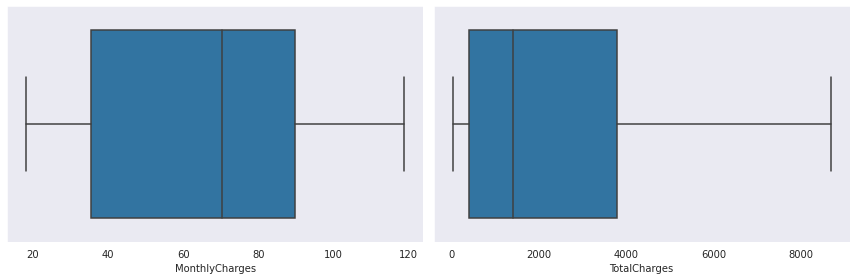

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='MonthlyCharges', data=df_clean, ax=ax[0])
sns.boxplot(x='TotalCharges', data=df_clean, ax=ax[1])
plt.tight_layout()

A coluna `TotalCharges` é o pagamento mensal (`MonthlyCharges`) multiplicado pelo número de meses que o clientes está na empresa (`tenure`). Portanto, essa coluna não agrega valor ao nosso algoritmo e podemos retirar ela dos nossos dados.



In [16]:
#Dropando a coluna TotalCharges
df_clean.drop('TotalCharges', axis=1, inplace = True)

Já a coluna `tenure`, representa o tempo (em meses) em que o cliente usa/usou o determindo serviço da empresa. 

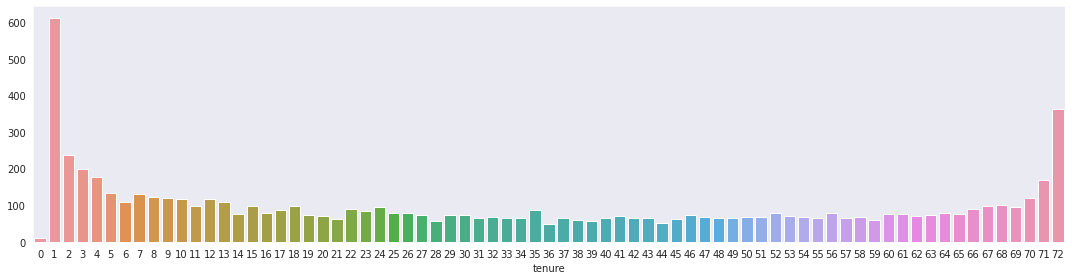

In [17]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(df_clean['tenure'])
plt.ylabel('')
plt.tight_layout();

Observamos que na coluna `tenure`, consta o valor 0 em meses, que representa os clientes que acabaram de assinar o serviço.

In [18]:
df_clean[df_clean['tenure']==0]['Churn'].value_counts()

No    11
Name: Churn, dtype: int64

Vemos que temos um total de 11 clientes que acabaram de assinar o serviço da empresa, logo nenhum deles vai ser taxado como churn. Portanto, iremos retirar esses valores do nosso Dataset, pois ele pode dar uma falsa confiança para variáeis que posteriormente podem ser forte indicadoras de Churn.

In [19]:
#Retirando tenure com valores iguais a zero
df_clean = df_clean[df.tenure != 0]

#Lidando com Variáveis Categóricas
É muito comum ver variáveis categóricas em um conjunto de dados. No entanto, nosso algoritmo de Machine Learning só pode ler valores numéricos. É essencial para o modelo transformar recursos categóricos em valores numéricos. 

Mas antes de fazer essa transformação, vamos entender as nossas variáveis categóricas. Elas estão divididas em dois tipos, as binárias(dois valores de resposta) e não binárias(mais de dois valores de resposta) vamos olhar os valores únicos entre elas.

In [20]:
#Valores categoricos Unicos
binary_categorical_values = [] 
multiple_categorical_values =[]
for col in df_clean.select_dtypes('object').columns:
    if df_clean[col].value_counts().shape[0] == 2:
        binary_categorical_values.append(col)
    else:
        multiple_categorical_values.append(col)

print("Variaveis categoricas com dois valores:", binary_categorical_values)
print("\nVariáveis Categóricas com Mais de dois Valores:", multiple_categorical_values)

Variaveis categoricas com dois valores: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Variáveis Categóricas com Mais de dois Valores: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


##Variáveis Categóricas Binárias

Para ter uma ideia de como estão as proporções dessas variáveis binárias, vamos fazer uso do gráfico de barra. 

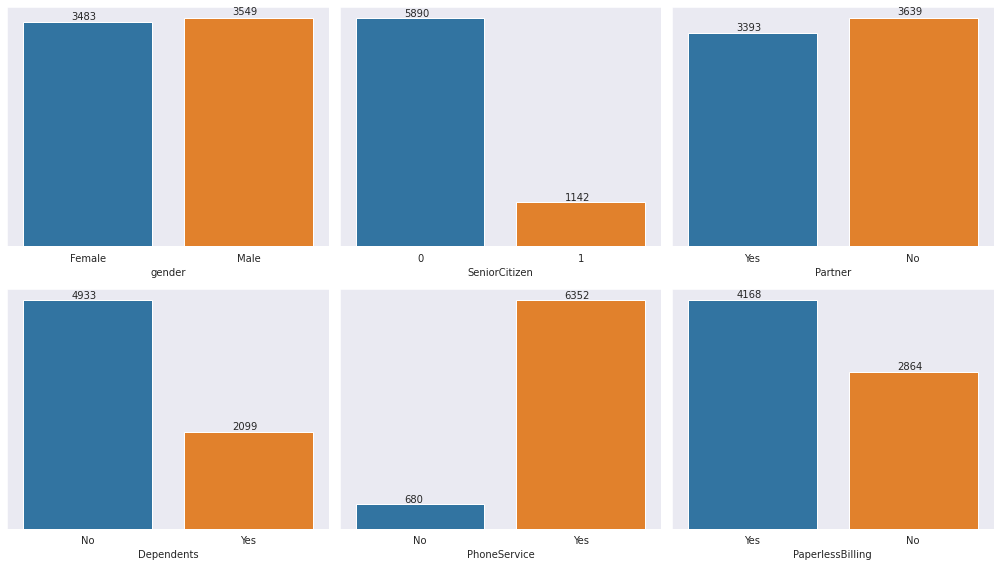

In [21]:
#  Categorical Data
list_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling' ]

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,8))

for i in list_features:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.countplot(df_clean[i])
    c = c + 1
    x = [df_clean[i].unique()[0], df_clean[i].unique()[1]]
    if df_clean[i].value_counts().index[0] == df_clean[i].unique()[0]:
        y = [df_clean[i].value_counts().values[0], df_clean[i].value_counts().values[1]]
    else:
        y = [df_clean[i].value_counts().values[1], df_clean[i].value_counts().values[0]]
    plt.yticks([])
    plt.ylabel('')
    # This is the location for the annotated text
    q = 1
    p = 50
    # Annotating the bar plot with the values (total death count)
    for q in range(len(x)):
        plt.annotate(y[q], (-0.1 + q, y[q] + p))


plt.tight_layout();
plt.show();


Há um grande desequilíbrio nas variáveis ​​`SeniorCitizen` e `PhoneService`. A maioria dos clientes são jovens e da mesma forma, a maioria dos clientes possuem um serviço de telefone.

É melhor verificar como a variável de destino (churn) muda de acordo com os recursos binários. Para poder fazer cálculos, precisamos alterar os valores da variável de destino.

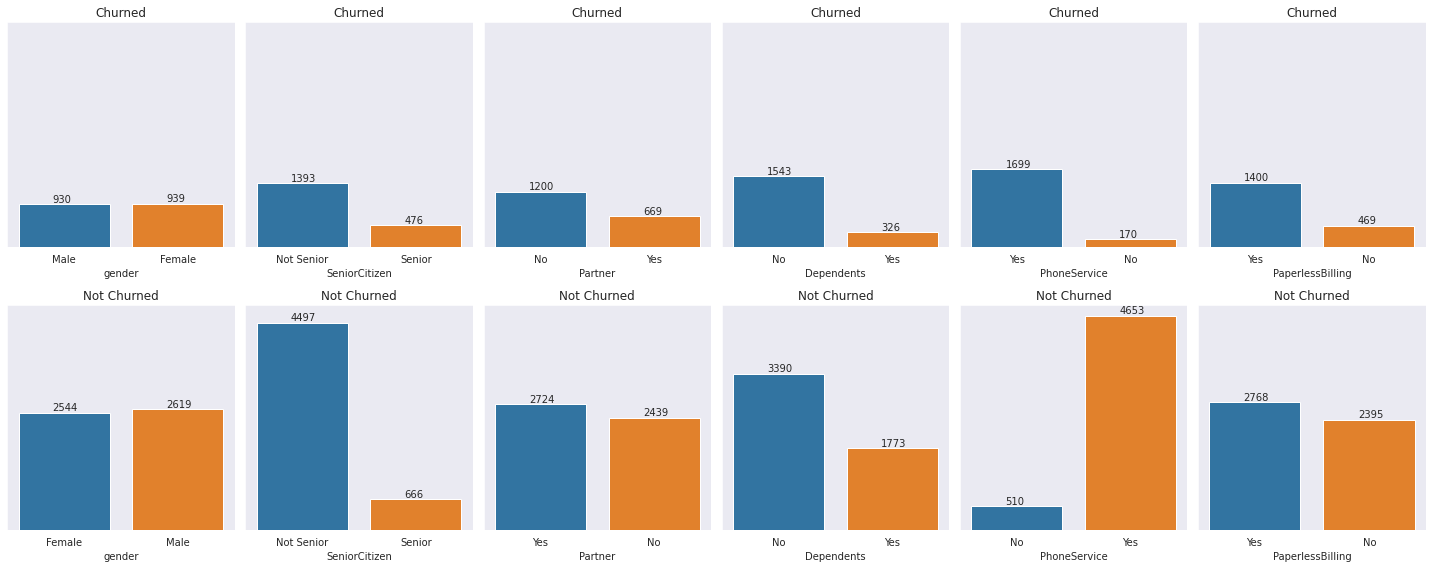

In [22]:
list_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling' ]
fig, ax = plt.subplots(2,6,figsize=(20, 8), sharey=True )
for i in range(len(list_features)):
  for j in range(2):
    if j == 0:
      sns.countplot(df_clean[df_clean.Churn == 'Yes'][list_features[i]], ax=ax[j,i]).set_title('Churned')
      x = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[0], df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[1]]
      if df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().index[0] == df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[0]:
        y = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[0], df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[1]]
      else:
        y = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[1], df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[0]]
      ax[j,i].get_yaxis().set_visible(False)
      # This is the location for the annotated text
      q = 1
      p = 50
        # Annotating the bar plot with the values (total death count)
      for q in range(len(x)):
          ax[j,i].annotate(y[q], (-0.1 + q, y[q] + p))
    else:
      sns.countplot(df_clean[df_clean.Churn == 'No'][list_features[i]], ax=ax[j,i]).set_title('Not Churned')
      x = [df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[0], df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[1]]
      if df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().index[0] == df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[0]:
        y = [df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[0], df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[1]]
      else:
        y = [df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[1], df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[0]]
      ax[j,i].get_yaxis().set_visible(False)
      # This is the location for the annotated text
      q = 1
      p = 50
        # Annotating the bar plot with the values (total death count)
      for q in range(len(x)):
          ax[j,i].annotate(y[q], (-0.1 + q, y[q] + p))

ax[0,1].set_xticklabels(['Not Senior', 'Senior']);
ax[1,1].set_xticklabels(['Not Senior', 'Senior']);
plt.tight_layout();
plt.plot();



A quantidade de clientes que cometeram Churn associados à variável gênero são bem próximas. Levando em conta que os clientes estão em mesma proporção de gênero, essa coluna não irá trazer informações pertinentes para ajudar na previsão do algoritmo. Portanto, a coluna `gender` não será usada no modelo de Machine Learning.

A variável `PhoneService` tem valores de Churn muito próximos (2%) mas iremos mante-la em nosso algoritmo. 

As demais variáveis monstram mais indicios de que agregram efeito em nossa variável alvo. 



In [23]:
#Drop of gender column
df_clean.drop('gender', axis=1, inplace=True)

##Variáveis Categóricas Restantes

Agora vamos ver como se portam as variáveis com mais de dois valores em suas colunas e ver quais delas podem influenciar no Churn. Como anteriormente, vamos olhar como estão distribuidos os valores em cada variável. Vamos começar com as variáveis relacionados a serviços de internet. 

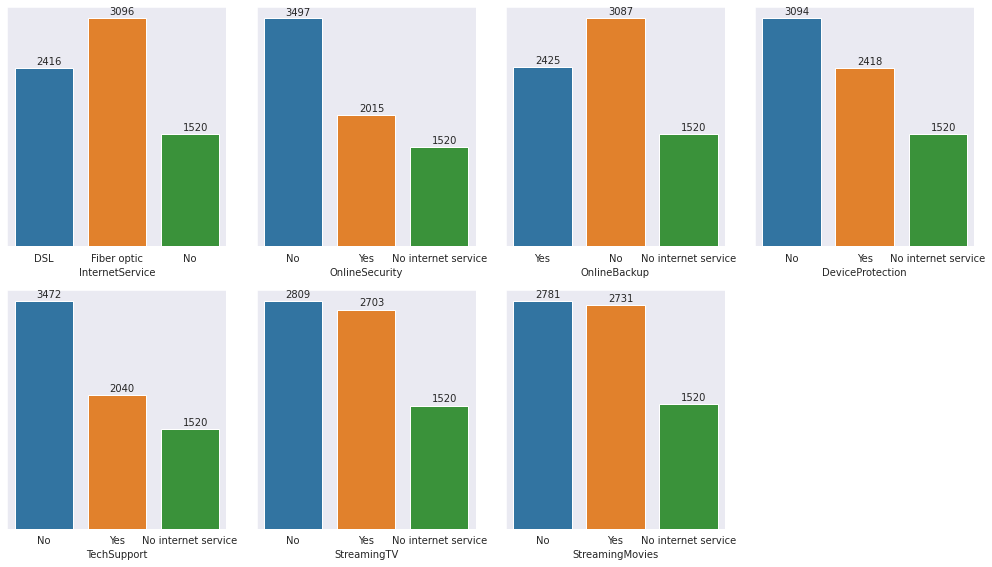

In [24]:
#  Categorical Data
list_features = ['InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies' ]

#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,8))

for i in list_features:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.countplot(df_clean[i])
    c = c + 1
    x = [df_clean[i].unique()[0], df_clean[i].unique()[1],df_clean[i].unique()[2]]
    if df_clean[i].value_counts().index[0] == df_clean[i].unique()[0]:
        y = [df_clean[i].value_counts().values[0], df_clean[i].value_counts().values[1],df_clean[i].value_counts().values[2]]
    else:
        y = [df_clean[i].value_counts().values[1], df_clean[i].value_counts().values[0],df_clean[i].value_counts().values[2]]
    plt.yticks([])
    plt.ylabel('')
    # This is the location for the annotated text
    q = 1
    p = 50
    # Annotating the bar plot with the values (total death count)
    for q in range(len(x)):
        plt.annotate(y[q], (-0.1 + q, y[q] + p))


plt.tight_layout();
plt.show();


Das variáveis presentes acima, vemos que as variáveis `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` são opções que dependem do cliente possuir um serviço de internet. Portanto, vamos olhar isoladamente a variável `InternetService`.

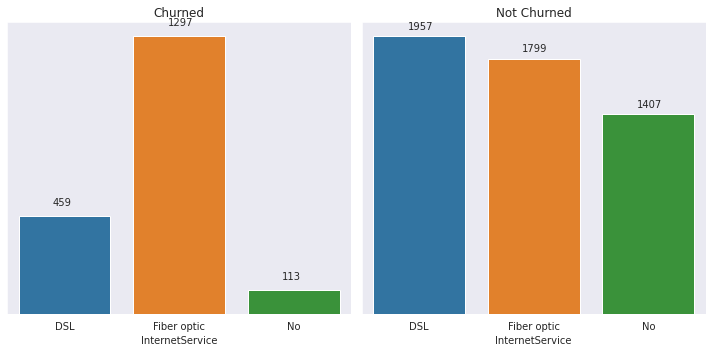

In [25]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
#Churn
sns.countplot(df_clean[df_clean.Churn == 'Yes']['InternetService'], ax=ax[0]).set_title('Churned')
x = [df_clean[df_clean.Churn == 'Yes']['InternetService'].unique()[0], df_clean[df_clean.Churn == 'Yes']['InternetService'].unique()[1],df_clean[df_clean.Churn == 'Yes']['InternetService'].unique()[2]]
y = [df_clean[df_clean.Churn == 'Yes']['InternetService'].value_counts().values[1], df_clean[df_clean.Churn == 'Yes']['InternetService'].value_counts().values[0],
     df_clean[df_clean.Churn == 'Yes']['InternetService'].value_counts().values[2]]
ax[0].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 50
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[0].annotate(y[q], (-0.1 + q, y[q] + p))


#Not Churn
sns.countplot(df_clean[df_clean.Churn == 'No']['InternetService'], ax=ax[1]).set_title('Not Churned')
x = [df_clean[df_clean.Churn == 'No']['InternetService'].unique()[0], df_clean[df_clean.Churn == 'No']['InternetService'].unique()[1],df_clean[df_clean.Churn == 'No']['InternetService'].unique()[2]]
y = [df_clean[df_clean.Churn == 'No']['InternetService'].value_counts().values[0], df_clean[df_clean.Churn == 'No']['InternetService'].value_counts().values[1],
     df_clean[df_clean.Churn == 'No']['InternetService'].value_counts().values[2]]
ax[1].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 50
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[1].annotate(y[q], (-0.1 + q, y[q] + p))

plt.tight_layout()
plt.show()



Essa variável nos mostra ser muito interessante para prever Churn, pois clientes que possuem internet de fribra optica são mais propensos a largarem o serviço da empresa. No gráfico acima, vemos que não há muita diferença em clientes que optam por fibra óptica ou por DSL. Isso pode indicar um serviço de fibra óptica inferior, mas antes de tirar conclusões preciptadas, vamos ver a difenrença de preços entre os serviços. 

In [26]:
df_clean[['MonthlyCharges','InternetService']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


O serviço de fibra óptica é mais caro do que o DSL, isso pode ser um motivo pelo qual clientes com serviço de fibra óptica são mais propensos a cometer Churn.

Vamos ver como é a proporção da Taxa de Churn com os serviços que dependem de internet.

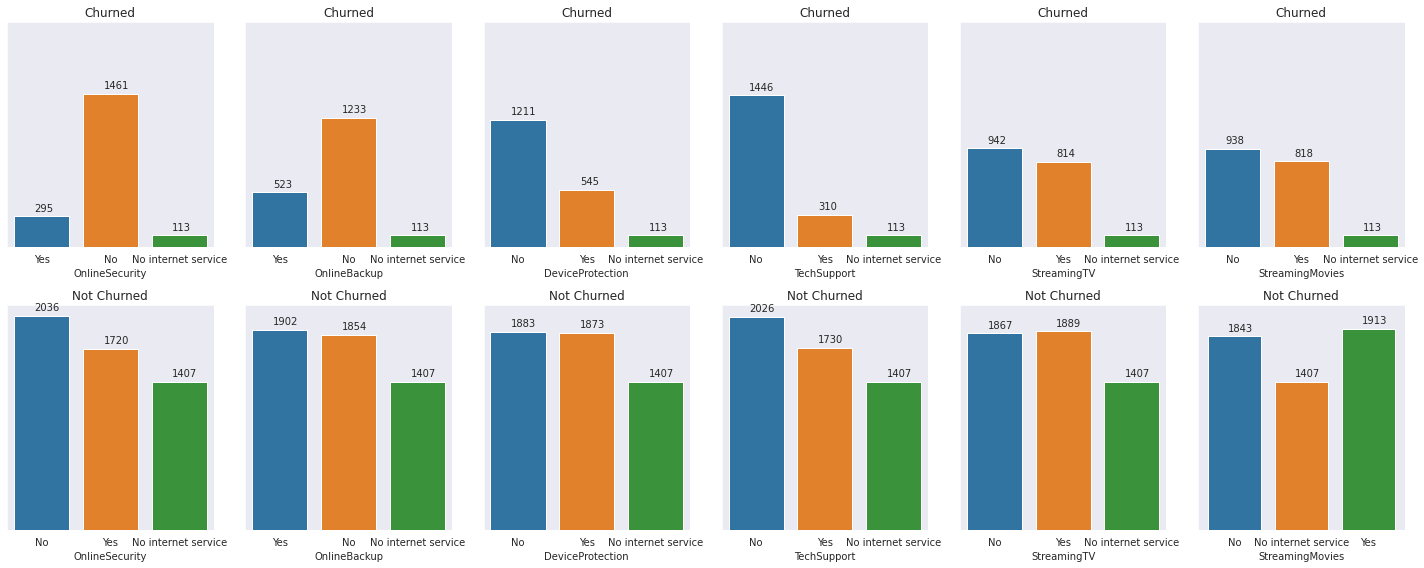

In [27]:
list_features = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies' ]
fig, ax = plt.subplots(2,6,figsize=(20, 8), sharey=True )
for i in range(len(list_features)):
  for j in range(2):
    if j == 0:
      sns.countplot(df_clean[df_clean.Churn == 'Yes'][list_features[i]], ax=ax[j,i]).set_title('Churned')
      x = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[0], df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[1],
           df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[2]]
      if df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().index[0] == df_clean[df_clean.Churn == 'Yes'][list_features[i]].unique()[0]:
        y = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[0], df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[1],
             df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[2]]
      else:
        y = [df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[1], df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[0],
             df_clean[df_clean.Churn == 'Yes'][list_features[i]].value_counts().values[2]]
      ax[j,i].get_yaxis().set_visible(False)
      # This is the location for the annotated text
      q = 1
      p = 50
        # Annotating the bar plot with the values (total death count)
      for q in range(len(x)):
          ax[j,i].annotate(y[q], (-0.1 + q, y[q] + p))
    else:
      sns.countplot(df_clean[df_clean.Churn == 'No'][list_features[i]], ax=ax[j,i]).set_title('Not Churned')
      x = [df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[0], df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[1],
           df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[2]]
      if df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().index[0] == df_clean[df_clean.Churn == 'No'][list_features[i]].unique()[0]:
        y = [df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[0], df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[1],
             df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[2]]
      else:
        y = [df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[1], df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[0],
             df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[2]]
      if list_features[i] == 'StreamingMovies':
        y = [df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[1], df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[2],
             df_clean[df_clean.Churn == 'No'][list_features[i]].value_counts().values[0]]
      ax[j,i].get_yaxis().set_visible(False)
      # This is the location for the annotated text
      q = 1
      p = 50
        # Annotating the bar plot with the values (total death count)
      for q in range(len(x)):
          ax[j,i].annotate(y[q], (-0.1 + q, y[q] + p))


plt.tight_layout();
plt.plot();



A diferença entre `StreamingTV` e `StreamingMovies` não é grande, mas eles ainda podem agregar valor ao modelo. Você pode decidir não incluir esses dois recursos. Os demais recursos relacionados ao serviço de Internet parecem ter taxas de churn diferentes para suas classes porque a taxa de churn muda de acordo com os clientes que têm esses serviços. 

###Serviço de Telefone

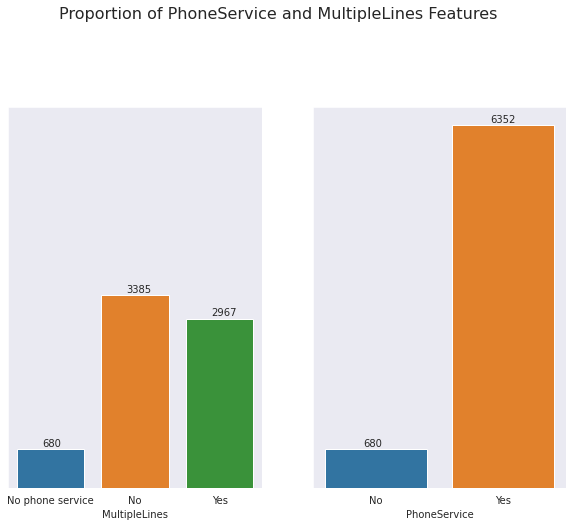

In [28]:
#Creating the Multiple Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
#Figure Title
fig.suptitle('Proportion of PhoneService and MultipleLines Features', fontsize=16,y=1.08)



#Column Plot [0,0]   
sns.countplot(df_clean['MultipleLines'], ax=ax[0])
x = ['No', 'Yes', 'No phone service']
y = [df_clean['MultipleLines'].value_counts().values[2], df_clean['MultipleLines'].value_counts().values[0],df_clean['MultipleLines'].value_counts().values[1]]
ax[0].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [0,1]   
sns.countplot(df_clean['PhoneService'], ax=ax[1])
x = ['Yes', 'No']
y = [df_clean['PhoneService'].value_counts().values[1], df_clean['PhoneService'].value_counts().values[0]]
ax[1].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1].annotate(y[i], (-0.1 + i, y[i] + j))

Os clientes que não possuem serviço de telefone, claramente não vão ter multiplas linhas. Note também que a resposta *No* da coluna `MultipleLines` representa os clientes que possuem apenas uma linha telefonica. Portanto, a coluna `MultipleLines` engloba a coluna `PhoneService` e ainda apresenta mais detalhes. Vamos retirar a coluna `PhoneService`, pois ela não irá agregar em nosso modelo.

In [29]:
#Dropping PhoneService Column
df_clean.drop('PhoneService', axis=1, inplace=True)

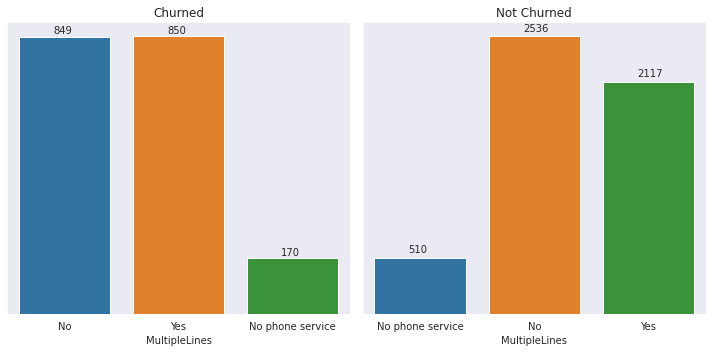

In [30]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
#Churn
sns.countplot(df_clean[df_clean.Churn == 'Yes']['MultipleLines'], ax=ax[0]).set_title('Churned')
x = [df_clean[df_clean.Churn == 'Yes']['MultipleLines'].unique()[0], df_clean[df_clean.Churn == 'Yes']['MultipleLines'].unique()[1],df_clean[df_clean.Churn == 'Yes']['MultipleLines'].unique()[2]]
y = [df_clean[df_clean.Churn == 'Yes']['MultipleLines'].value_counts().values[1], df_clean[df_clean.Churn == 'Yes']['MultipleLines'].value_counts().values[0],
     df_clean[df_clean.Churn == 'Yes']['MultipleLines'].value_counts().values[2]]
ax[0].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 10
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[0].annotate(y[q], (-0.1 + q, y[q] + p))


#Not Churn
sns.countplot(df_clean[df_clean.Churn == 'No']['MultipleLines'], ax=ax[1]).set_title('Not Churned')
x = [df_clean[df_clean.Churn == 'No']['MultipleLines'].unique()[0], df_clean[df_clean.Churn == 'No']['MultipleLines'].unique()[1],df_clean[df_clean.Churn == 'No']['MultipleLines'].unique()[2]]
y = [df_clean[df_clean.Churn == 'No']['MultipleLines'].value_counts().values[2], df_clean[df_clean.Churn == 'No']['MultipleLines'].value_counts().values[0],
     df_clean[df_clean.Churn == 'No']['MultipleLines'].value_counts().values[1]]
ax[1].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 50
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[1].annotate(y[q], (-0.1 + q, y[q] + p))

plt.tight_layout()
plt.show()



As respostas da coluna mostram uma taxa de Churn muito próximas, mas irei manter a variável no nosso modelo. 



###Contrato e Pagamento

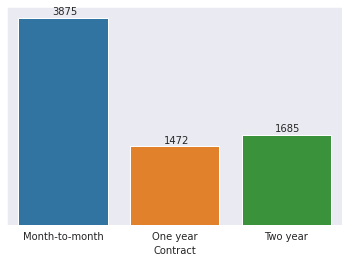

In [31]:
fig, ax = plt.subplots()
sns.countplot(df_clean['Contract']);
x = ['Month-to-month', 'One Year Contract', 'Two Year']
y = [df_clean['Contract'].value_counts().values[0], df_clean['Contract'].value_counts().values[2],df_clean['Contract'].value_counts().values[1]]
ax.get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax.annotate(y[i], (-0.1 + i, y[i] + j))
plt.show();

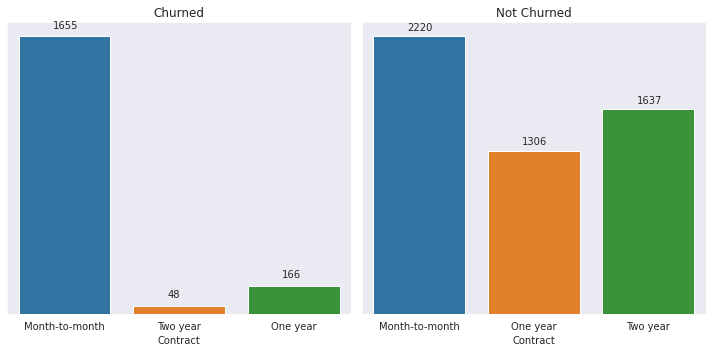

In [32]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
#Churn
sns.countplot(df_clean[df_clean.Churn == 'Yes']['Contract'], ax=ax[0]).set_title('Churned')
x = [df_clean[df_clean.Churn == 'Yes']['Contract'].unique()[0], df_clean[df_clean.Churn == 'Yes']['Contract'].unique()[2],df_clean[df_clean.Churn == 'Yes']['Contract'].unique()[1]]
y = [df_clean[df_clean.Churn == 'Yes']['Contract'].value_counts().values[0], df_clean[df_clean.Churn == 'Yes']['Contract'].value_counts().values[2],
     df_clean[df_clean.Churn == 'Yes']['Contract'].value_counts().values[1]]
ax[0].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 50
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[0].annotate(y[q], (-0.1 + q, y[q] + p))


#Not Churn
sns.countplot(df_clean[df_clean.Churn == 'No']['Contract'], ax=ax[1]).set_title('Not Churned')
x = [df_clean[df_clean.Churn == 'No']['Contract'].unique()[0], df_clean[df_clean.Churn == 'No']['Contract'].unique()[1],df_clean[df_clean.Churn == 'No']['Contract'].unique()[2]]
y = [df_clean[df_clean.Churn == 'No']['Contract'].value_counts().values[0], df_clean[df_clean.Churn == 'No']['Contract'].value_counts().values[2],
     df_clean[df_clean.Churn == 'No']['Contract'].value_counts().values[1]]
ax[1].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 50
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[1].annotate(y[q], (-0.1 + q, y[q] + p))

plt.tight_layout()
plt.show()



Vemos que clientes com contratos de curto prazo são mais propensos a largarem o serviço. Portanto, vemos o motivo do qual muitas empresas costumam fazer ofertas mais em contas a contratos a longo prazo.

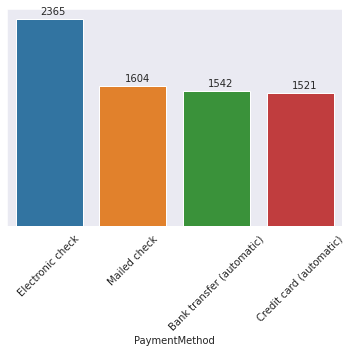

In [33]:
fig, ax = plt.subplots()
sns.countplot(df_clean['PaymentMethod']);
x = ['Electronic check', 'Mailed check', 'nk transfer (automatic)','Credit card (automatic)']
y = [df_clean['PaymentMethod'].value_counts().values[0], df_clean['PaymentMethod'].value_counts().values[1],df_clean['PaymentMethod'].value_counts().values[2],df_clean['PaymentMethod'].value_counts().values[3]]
ax.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax.annotate(y[i], (-0.1 + i, y[i] + j))
plt.show();

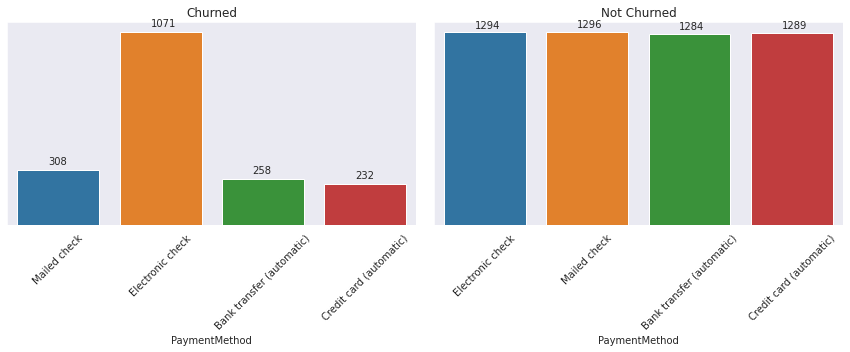

In [34]:
#Churn Rate for Payment
fig, ax = plt.subplots(1,2, figsize = (12,5))
#Churn
sns.countplot(df_clean[df_clean.Churn == 'Yes']['PaymentMethod'], ax=ax[0]).set_title('Churned')
x = [df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].unique()[0], df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].unique()[1],
     df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].unique()[2], df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].unique()[3]]
y = [df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].value_counts().values[1], df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].value_counts().values[0],
     df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].value_counts().values[2], df_clean[df_clean.Churn == 'Yes']['PaymentMethod'].value_counts().values[3]]
ax[0].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 30
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[0].annotate(y[q], (-0.1 + q, y[q] + p))


#Not Churn
sns.countplot(df_clean[df_clean.Churn == 'No']['PaymentMethod'], ax=ax[1]).set_title('Not Churned')
x = [df_clean[df_clean.Churn == 'No']['PaymentMethod'].unique()[0], df_clean[df_clean.Churn == 'No']['PaymentMethod'].unique()[1],
     df_clean[df_clean.Churn == 'No']['PaymentMethod'].unique()[2], df_clean[df_clean.Churn == 'No']['PaymentMethod'].unique()[3]]
y = [df_clean[df_clean.Churn == 'No']['PaymentMethod'].value_counts().values[1], df_clean[df_clean.Churn == 'No']['PaymentMethod'].value_counts().values[0],
     df_clean[df_clean.Churn == 'No']['PaymentMethod'].value_counts().values[3], df_clean[df_clean.Churn == 'No']['PaymentMethod'].value_counts().values[2]]
ax[1].get_yaxis().set_visible(False)
# This is the location for the annotated text
q = 1
p = 30
# Annotating the bar plot with the values (total death count)
for q in range(len(x)):
  ax[1].annotate(y[q], (-0.1 + q, y[q] + p))

for ax in fig.axes:
    ax.tick_params('x',labelrotation=45)
plt.tight_layout()
plt.show()



Podemos ver que a maioria dos clientes efetua pagamento em check, que também são os clientes mais propensos a largarem o serviço. Portanto pode ser feita uma análise mais aprofundada para saber se os clientes que pagam com check tem relação com alguma outra variável presente e tentar fazer algum plano para esse cliente permanecer na empresa. 

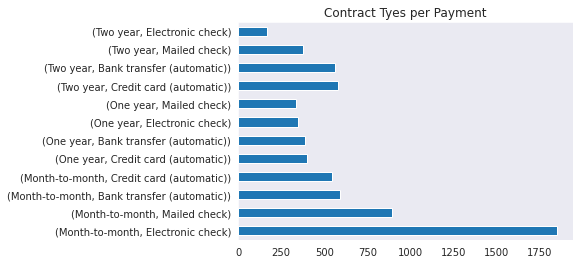

In [35]:
df_clean.groupby(['Contract'])['PaymentMethod'].value_counts().plot(kind='barh')
plt.ylabel('')
plt.title('Contract Tyes per Payment')
plt.show();

Ao olharmos os tipos de pagamentos em relação aos contratos, vemos que clientes que optam por contratos de curto prazo costumam, em sua maioria, pagar em check. Portanto, a empresa pode identificar esses clientes e tentar fazer uma boa oferta para ficarem a longo prazo.

Vamos agora tentar identificar se quanto maior o tempo do cliente na empresa, será menor as chances dele cometer Churn.

In [36]:
#The average tenure in months for people who left the company
round(df_clean[['tenure','Churn']].groupby(['Churn']).mean())

,tenure
Churn,
No,38.0
Yes,18.0


Vemos que a média de clientes que deixam a empresa são aproximadamente 20 meses menos do que pessoas que costumam ficar. O que mostra que quanto maior o tempo de um cliente na empresa, menor as chances dele cometer Churn. Também observamos isso na coluna `Contract`, onde clientes com contratos a longo prazo, tem menos chance de cometer Churn. Mas falta confirmar se os clientes com contratos a longo prazo, são os que possuem a maior tenure.

In [37]:
df_clean[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


Como esperado, clientes com contratos a longo prazo, tem maior grau de fidelidade com a empresa do que clientes com contratos a curto prazo. Essas duas variáveis, estão altamente correlacionadas. Portanto, manter a variável `Contract` vai adicionar pouca informação para a identificação de Churn do nosso modelo. 

In [38]:
df_clean.drop('Contract', axis=1, inplace=True)

Note como essa fase de análise exploratória é muito importante, através dela, conseguimos identificar variáveis que agregam pouca informação para o modelo. Logo, é desnecessário incluir todas as variáveis no modelo. Adicionando variáveis não necessarias, podemos aumentar a complexidade do modelo, pois modelos complexos tendem a overfit e não generalizar bem para novas variáveis. Retirarmos algumas variáveis do nosso dataset. 

* `Contract`
* `CustomerID`
* `PhoneService`
* `TotalCharges`
* `Gender`

Agora que finalizamos esse processo, podemos começar a trabalhar no nosso modelo de machine learning.

# Preparando os Dados

##Variáveis Categóricas

Quando lidamos com variáveis categoricas, precisamos transformá-las em variáveis numéricas antes de treinarmos nosso modelo de Machine Learning. Temos que ter um cuidado ao fazer essa transformação, pois ao transformar as variáveis, um número sera designado a cada categoria e dessa forma, a categoria com números maiores, será considerada mais importante. Como estamos lidando em maioria com variáveis categóricas não binárias, temos que tomar cuidado para isso não ocorrer. 






In [39]:
#Data pre-processing
#Putting all binary columns in a list
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
print('Todas variáveis binarias:', binary_var)
#Putting all Numerical Variables in a list different of binary (senior column is numeric and binary)
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
print('\nTodas variáveis Numéricas não binárias:', num_var)
#Non binary variables
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]
print('\nTodas variáveis Categóricas não binárias:', cat_var)



Todas variáveis binarias: ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']

Todas variáveis Numéricas não binárias: ['tenure', 'MonthlyCharges']

Todas variáveis Categóricas não binárias: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


Para transformar as variáveis categóricas binárias vamos importar do sklearn o `LabelEnconder`.

In [40]:
#Import Library
from sklearn.preprocessing import LabelEncoder
#Creating a new Copy of the DataFrame
df_proc = df_clean.copy()
le = LabelEncoder()
#Label Enconding for Binary Variables
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])


Vamos agora usar o método `get_dummies` do pandas (Também poderia ser feito usando o `OneHotEnconder` do Sklearn) para transformar as variáveis categóricas não binárias em colunas de 0's e 1's. Justamente, para tentar impedir que valores númericos altos sejam considerados como mais importantes.


In [41]:
# Encoding for categorical columns with multiple classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

As demais mudanças que iremos fazer no nosso conjunto de dados, tais como, padronização e resample serão feita após separarmos nosso dataset em treino e teste. Para não ter risco de enviesar o nosso conjunto teste.

In [42]:
df_proc.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


#Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

A primeira coisa que temos que fazer no nosso modelo de machine learning é separar as variáveis entre variáveis de treino e variavéis de teste.

In [43]:
#Importing the traing test split library
from sklearn.model_selection import train_test_split
X = df_proc.drop('Churn', axis = 1)
y = df_proc['Churn']

#Traing and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

Para essa etapa, iremos criar um projeto simples, aonde iremos comparar o desempenho de diferentes modelos de machine learning, após isso, iremos focar em um modelo e melhorar ele com o uso de hiperparámetros. No momento não será feito nenhum ajuste nos hiperparâmetros e faremos o balanceamento de dados, feature engineering ou feature selection (entre outros) em nosso conjunto de treino, para tentar não inviesar o nossos dados de teste. Os dados de testes tem que se parecer o máximo possível com dados novos.

Vamos criar uma função, que irá ter como entrada os dados de treino (`X_train` e `y_train`) e um modelo classificador do Scikit-Learn. Nessa função, iremos aplicar [cross validation](https://towardsdatascience.com/cross-validation-430d9a5fee22), de forma que dentro dos dados de treino não seja aplicada nenhuma transformação nos dados de validação, com propósito de simular uma condição onde nosso modelo de machine learning nunca tenha visto esse subconjunto de validação. Essa etapa de padronização ou qualquer outra de pré-processamento, pode ser estruturada com um [pipeline](https://scikit-learn.org/stable/modules/compose.html#combining-estimators), aonde podemos aplicar feature selection, normalization, padronização no conjunto de treino apenas e alterando conjunto de validação após o treinamento em cada etapa.

In [44]:
def val_model(X, y, clf, quite=False):
    
    #quite: bool, indicando se a função deve imprimir os resultados ou não.
    # Returns :float, média dos scores da cross-validation.
    # clf: modelo de classificação
    
    X = np.array(X)
    y = np.array(y)

    #creating a pipeline and performing standardization in the cross validation
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=5)

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Vamos aplicar a pipeline acima no modelo de classificação *Random Forest* e imprimir a média do recal que recebemos da função criada acima. Lembrando que a métrica de avaliação do modelo fica a sua escolha. Estou usando Recall, pois ele preve o número de churns previstos corretamente. 

In [45]:
# criar baseline e ver desempenho
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)


Recall: 0.47 (+/- 0.02)


Agora temos um ponto de partida para comparar se os ajustes melhoram ou pioram o desempenho do modelo. O Recall acima é bastante condizente com os dados atuais, pois não balanceamos os nossos dados, o que faz o modelo acusar muitos falsos negativos. Agora iremos aplicar o balanceamento e fazer a padronização dos dados de treino usando o método *undersampling* e *StandardScaler*. Aplicamos no nossos dados de treino para manter os dados de teste os mais próximos possivel de dados novos que a empresa irá receber.

Optei por usar o undersampling, pois ele acaba gerando um maior número de falsos positivos (onde um cliente que não é churn é classificado como churn) e a consequência disso pode acabar sendo oferecer uma promoção a um cliente que não iria largar a empresa, mas isso é algo a ser analisado e trabalhado de forma mais complexa numa situação real. 



In [46]:
#importing librarys
from imblearn.under_sampling import RandomUnderSampler
#  padronizar os  dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#X_train_rus, y_train_rus = oversample.fit_sample(X_train, y_train)


#balancear os dados

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

Por mais que estamos aplicando padronização no conjunto teste, só iremos precisar dele ao fim do modelo.

Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* SVC
* Regressão Logística


In [47]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, svc, lr, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.725018
DecisionTreeClassifier,0.684620
SVC,0.780295
LogisticRegression,0.764697
XGBClassifier,0.800143


#Aplicação dos Hiperparâmetros

Agora que avaliamos diferentes modelos e suas precisções, vemos acima que  modelos apresentam resultados reativamente próximos, mas iremos seguir com `XGBClassifier`, pois foi o modelo com a melhor precisão e possuí uma gama de hiperparâmetros. Para escolher os valores dos nossos hiperparâmetros, iremos usar o [GridSearch](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py), que é o processo de realizar o ajuste para determinar os valores ideais de hiperparametro para um determinado modelo.

A seguir, veremos métodos para ajustar os hiperparâmetros do modelo `XGBoost`. Em um mundo ideal, com recursos infinitos e onde o tempo não é um problema, poderiamos executar um gigante `GridSearch` com todos os parâmetros juntos e encontrar a solução ideal.


In [48]:
#Importanto métricas de avaliação 
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
#Importando plot da matriz de confusão
from scikitplot.metrics import plot_confusion_matrix, plot_roc
#Uma variação de k-fold: Cada conjunto contém aproximadamente a mesma porcentagem de amostras de cada classe de destino.
from sklearn.model_selection import StratifiedKFold
#Importando o gridsearch
from sklearn.model_selection import GridSearchCV

##Escolha e Tomada de Valores para os Hiperparâmetros
Para nosso modelo `XGBClassifier`, iremos começar escolhendo um valor para `learning_rate` e `n_estimators` (lembrando que quantos mais árvores você tiver, é aconselhável tomar um número menor para o `learning_rate`). Vamos começar com 
* `learning_rate` = 0.1 
* `n_estimators` = 100. 

A partir disso, iremos alterar os valores com base na previsão do nosso modelo de Machine Learning, também pode ser usado o método `GridSearchCV`, para tentar otimizar a busca pora os valores do determinado hiperparâmetro. 

Eu particulamente procuro uma boa taxa de Learning Rate e um bom número de árvores e a partir disso, procuro os valores para os demais hiperparâmetros, usando o `GridSearchCV`.

Dessa forma, partindo da learning_rate = 0.0005, encontramos:

* n_estimators=810
* learning_rate = 0.0005,
* max_depth=3,
* min_child_weight=2,
* gamma=0.5
                    
Obs.: Após o parágrafo de conclusão há uma pequena explicação sobre como cada parâmetro age sobre o modelo de classificação.






In [49]:
#GridSearch Para Hiperparâmetros
''' xgb = XGBClassifier(learning_rate=0.0005, gpu_id='0')

param_grid = {
 'n_estimators':range(0,100,10),
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1),
 'gamma':[i/10.0 for i in range(0,10)],
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))
'''

' xgb = XGBClassifier(learning_rate=0.0005, gpu_id=\'0\')\n\nparam_grid = {\n \'n_estimators\':range(0,100,10),\n \'max_depth\':range(1,8,1),\n \'min_child_weight\':range(1,5,1),\n \'gamma\':[i/10.0 for i in range(0,10)],\n \'learning_rate\':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]\n}\n\n# identificar melhor parâmetro\nkfold = StratifiedKFold(n_splits=10, shuffle=True)\ngrid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X_train_rus, y_train_rus)\n\n# ver resultados\nprint("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))\n'

              precision    recall  f1-score   support

           0       0.93      0.45      0.61      1300
           1       0.37      0.90      0.52       458

    accuracy                           0.57      1758
   macro avg       0.65      0.67      0.56      1758
weighted avg       0.78      0.57      0.58      1758

AUC: 0.6748



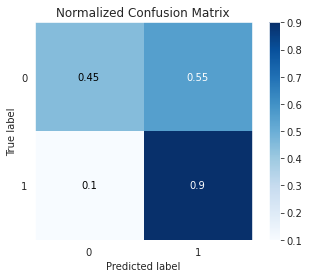

In [76]:
# modelo final
xgb = XGBClassifier(n_estimators=810,learning_rate = 0.0005,
                    max_depth=3,
                    min_child_weight=2,
                    gamma=0.2,
                    gpu_id='0', random_state=0)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

#Conclusão

O objetivo deste projeto era desenvolver um modelo que pudesse determinar a taxa de churn de clientes de uma empresa de telecomunicações da forma mais eficiente possível.

Na nossa análise exploratória, vimos alguns indicadores que possam levar clientes nessa empresa a cometer churn. Também vimos como identificar variáveis que não agregam ao modelo.

Pela matriz de confusão, obtemos um recall de 90%, isso indica que nosso modelo previu corretamente 90% dos clientes que iam cometer Churn. Porém estamos lidando uma uma taxa consideravelmente alta de falsos positivos, cerca de 55%, isso indica que 55% dos clientes que foram taxados como chrun, na verdade não eram. Isso acarreta numa quantidade alta de promoções sendo oferecidas a clientes que não iam deixar o serviço da empresa. Portanto o recall, por mais que seja uma métrica de muita importância nesse modelo, não é a única que deve ser levada em conta. Num caso real a equipe deveria conversar sobre as possíveis aproximações para o problema em prol de reduzir o número de falsos positivos e mandar promoções apenas para os clientes que realmente pretendem cometer Churn.

#Explicação Sobre Cada Hiperparâmetro

A maioria das implementações do XGB é configurada por padrão com um número relativamente pequeno de árvores, como centenas ou milhares. O motivo geral é que, na maioria dos problemas, adicionar mais árvores além de um limite não melhora o desempenho do modelo.A razão está na forma como o modelo de árvore impulsionado é construído, sequencialmente, onde cada nova árvore tenta modelar e corrigir os erros cometidos pela sequência das árvores anteriores. Rapidamente, o modelo atinge um ponto de retornos decrescentes.O número de Árvores em um modelo *XBGBoost* é especificado pelo *XBGClassifiers*, usando o parâmetro `n_estimators`(O padrão é 100).

Learning Rate controla a influência de cada árvore que é criada. Por isso, esses parâmetros são interligados.



No aumento de gradiente, podemos controlar o tamanho das árvores de decisão, também chamadas de número de camadas ou profundidade (`max_depth`).

Espera-se que as árvores rasas tenham baixo desempenho porque capturam poucos detalhes do problema e são geralmente chamadas de aprendizado fraco. Árvores mais profundas geralmente capturam muitos detalhes do problema e causam overfit no conjunto de treinamento, limitando a capacidade de fazer boas previsões sobre novos dados. 


Junto com o `max_depth`, precisamos olhar para o `min_child_weight`. Se a etapa de partição em árvore resultar em um *leaf node* com a soma do peso da instância menor que min_child_weight, o processo de construção desistirá de particionamento ainda mais. Quanto maior, mais conservador será o algoritmo. Isso é para controlar over-fitting. Portanto, são dois parâmetros que devem ser implementados juntos.


Um nó é dividido apenas quando a divisão resultante dá uma redução positiva na função de perda. Gama especifica a redução de perda mínima necessária para fazer a divisão. Torna o algoritmo conservador. Os valores podem variar dependendo da função de perda e devem ser ajustados.


Pra mais informações, acesse o [Hiperparâmetros XGboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) para conhecer outros hiperparâmetros como eles agem no modelo.



